In [4]:
## Movie Recommendation System on basis of item with Pearson Correlation

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [19]:
mydf=pd.read_csv(r"Downloads\ml-100k\ml-100k\u.data",sep='\t',names=['user_id','item_id','rating','timestamp'])

In [20]:
mydf.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [22]:
movie_titles=pd.read_csv('Downloads/Movie_Titles.csv',encoding='unicode_escape')

In [23]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [24]:
mydf=pd.merge(mydf,movie_titles,on="item_id")

In [26]:
mydf.head(20)

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [27]:
ratings=pd.DataFrame(mydf.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [28]:
ratings['number_of_ratings']=mydf.groupby('title')['rating'].count()

In [31]:
ratings.head(10)

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


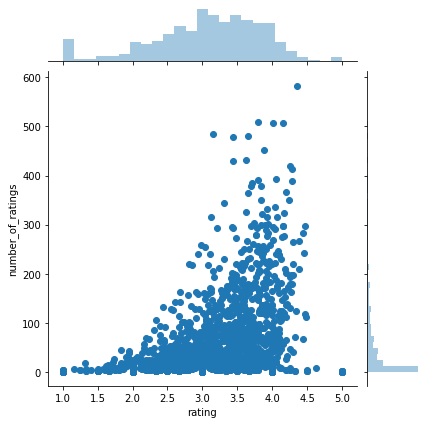

In [33]:
#ploting the joinplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x="rating",y="number_of_ratings",data=ratings)

In [34]:
#creating user-item interaction matrix
movie_matrix_UII=mydf.pivot_table(index='user_id',columns='title',values='rating')
movie_matrix_UII.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0


In [35]:
#most rated movies
ratings.sort_values('number_of_ratings',ascending=False).head()

,rating,number_of_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


# Making Recommendation -Example Movie - Liar Liar

In [37]:
#fetching rating for Liar Liar
Liar_User_Rating=movie_matrix_UII['Liar Liar (1997)']

In [38]:
Liar_User_Rating.head()

user_id
1    NaN
2    1.0
3    2.0
4    5.0
5    NaN
Name: Liar Liar (1997), dtype: float64

In [39]:
similar_to_Liar=movie_matrix_UII.corrwith(Liar_User_Rating)

In [42]:
similar_to_Liar.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

In [43]:
# creating the threshold for minimum number of ratings
corr_Liar=pd.DataFrame(similar_to_Liar,columns=['correlation'])
corr_Liar.dropna(inplace=True)
corr_Liar.head()


,correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [44]:
#bring in ratings
corr_Liar=corr_Liar.join(ratings['number_of_ratings'])
corr_Liar.head()

,correlation,number_of_ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [47]:
corr_Liar[corr_Liar['number_of_ratings']>20].sort_values(by='correlation',ascending=False).head(10)

,correlation,number_of_ratings
title,,
Liar Liar (1997),1.000000,485
Deceiver (1997),0.851467,29
My Man Godfrey (1936),0.700794,27
"Prophecy, The (1995)",0.685905,32
Bio-Dome (1996),0.680800,31
Tie Me Up! Tie Me Down! (1990),0.668145,32
Ghost in the Shell (Kokaku kidotai) (1995),0.666214,26
Stephen King's The Langoliers (1995),0.624729,29
Higher Learning (1995),0.614357,30


## Book Recommendation System-Kindly Solve the Problem in this Section

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
books=pd.read_csv('Downloads\BX-CSV-Dump\BX-Books.csv',sep=';',encoding='latin-1',error_bad_lines=False)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [60]:
books.columns.tolist()

['ISBN',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'Image-URL-S',
 'Image-URL-M',
 'Image-URL-L']

In [61]:
books.shape

(271360, 8)

In [62]:
books.columns=['ISBN','BookTitle','BookAuthor','YearofPublication','Publisher','ImageURLs','ImageURLM','ImageURLL']

In [64]:
users=pd.read_csv('Downloads\BX-CSV-Dump\BX-Users.csv',sep=';',encoding='latin-1',error_bad_lines=False)
users.columns.tolist()

['User-ID', 'Location', 'Age']

In [65]:
users.columns=['UserId','Location','Age']

In [71]:
users.head()

,UserId,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [72]:
users.shape

(278858, 3)

In [73]:
rating=pd.read_csv('Downloads\BX-CSV-Dump\BX-Book-Ratings.csv',error_bad_lines=False,sep=';',encoding='latin-1')
rating.columns.tolist()

['User-ID', 'ISBN', 'Book-Rating']

In [74]:
rating.columns=['UserId','ISBN','BookRating']

In [75]:
rating.head()

,UserId,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [76]:
rating.shape

(1149780, 3)

In [77]:
mydf=pd.merge(rating,books,on='ISBN')

In [78]:
mydf.head()

,UserId,ISBN,BookRating,BookTitle,BookAuthor,YearofPublication,Publisher,ImageURLs,ImageURLM,ImageURLL
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [79]:
ratings=pd.DataFrame(mydf.groupby('BookTitle')['BookRating'].mean())
ratings.head()

,BookRating
BookTitle,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25
Always Have Popsicles,0.00
Apple Magic (The Collector's series),0.00
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.00
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00


In [80]:
ratings['number_of_rating']=mydf.groupby('BookTitle')['BookRating'].count()

In [81]:
ratings.head()

,BookRating,number_of_rating
BookTitle,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25,4
Always Have Popsicles,0.00,1
Apple Magic (The Collector's series),0.00,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.00,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00,1


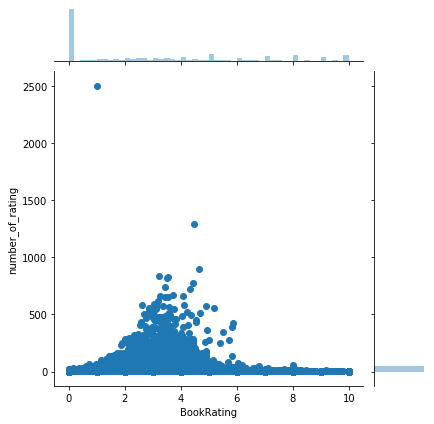

In [82]:
#ploting the joinplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x="BookRating",y="number_of_rating",data=ratings)

# What is problem here kindly help me in solving 

In [116]:
#creating user-item interaction matrix
books_matrix_UII=mydf.pivot_table(index='UserId',columns='BookTitle',values='BookRating')
books_matrix_UII.head()

IndexError: index 729372377 is out of bounds for axis 0 with size 729249046

In [117]:
#most rated movies
ratings.sort_values('number_of_rating',ascending=False).head()

,BookRating,number_of_rating
BookTitle,,
Wild Animus,1.019584,2502
The Lovely Bones: A Novel,4.468726,1295
The Da Vinci Code,4.642539,898
A Painted House,3.231504,838
The Nanny Diaries: A Novel,3.530193,828


In [123]:
#fetching rating for Liar Liar
Lovely_Bones_Rating=books_matrix_UII['The Lovely Bones: A Novel']

In [124]:
Lovely_Bones_Rating.head()

BookRating    4.468726
Name: The Lovely Bones: A Novel, dtype: float64

In [125]:
similar_to_Lovely_Bones=books_matrix_UII.corrwith(Lovely_Bones_Rating)

In [126]:
similar_to_Lovely_Bones.head()

BookTitle
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)   NaN
 Always Have Popsicles                                                                                       NaN
 Apple Magic (The Collector's series)                                                                        NaN
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                        NaN
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                  NaN
dtype: float64

In [127]:
# creating the threshold for minimum number of ratings
corr_Lovely_Bones=pd.DataFrame(similar_to_Lovely_Bones,columns=['correlation'])
corr_Lovely_Bones.dropna(inplace=True)
corr_Lovely_Bones.head()


,correlation
BookTitle,


In [128]:
# creating the threshold for minimum number of ratings
corr_Lovely_=pd.DataFrame(similar_to_Lovely_Bones,columns=['correlation'])
corr_Lovely_Bones.dropna(inplace=True)
corr_Lovely_Bones.head()


,correlation
BookTitle,


In [129]:
#bring in ratings
corr_Lovely_Bones=corr_Lovely_Bones.join(ratings['number_of_rating'])
corr_Lovely_Bones.head()

,correlation,number_of_rating
BookTitle,,


In [130]:
corr_Lovely_Bones[corr_Lovely_Bones['number_of_rating']>20].sort_values(by='correlation',ascending=False).head(10)

,correlation,number_of_rating
BookTitle,,
